# Maximum Likelihood Estimation
In this tutorial, we are going to learn what MLE gives us, and the comparison with linear regression (ordinary least squares).

Source:

- https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f
- https://stackoverflow.com/questions/43602270/what-is-probability-density-function-in-the-context-of-scipy-stats-norm/43612986

In [1]:
# import libraries
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
# import pymc3 as pm3
# import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

### Let's define our noisy dataset

In [2]:
# generate data
N = 100
x = np.linspace(0,20,N)
ϵ = np.random.normal(loc = 0.0, scale = 5.0, size = N)
y = 3*x + ϵ

#### Now we use the ordinary least square method to do our predictions.

In [3]:
model=sm.OLS(y,x)
result=model.fit()
estimated_value=result.predict(x)

In [4]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     4394.
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           7.82e-84
Time:                        16:53:08   Log-Likelihood:                -306.79
No. Observations:                 100   AIC:                             615.6
Df Residuals:                      99   BIC:                             618.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.9934      0.045     66.284      0.000       2.904       3.083
==============================================================================
Omnibus:                        3.440   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                3.030
Skew:                           0.424   Prob(JB):                        0.220
Kurtosis:                       3.093   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

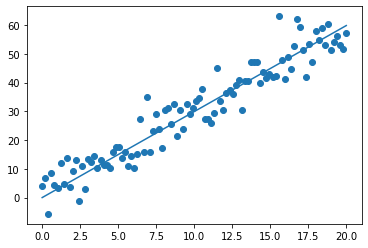

In [5]:
plt.scatter(x,y)
plt.plot(x,estimated_value)

### Maximum likelihood estimation

probability density function of the normal distribution, `stats.norm.logpdf`, expressed in Python is:

$$
\begin{document}
from math import pi
from math import exp
from scipy import stats
def normal_pdf(x, mu, sigma):
    return 1.0 / (sigma * (2.0 * pi)**(1/2)) * exp(-1.0 * (x - mu)**2 / (2.0 * (sigma**2)))
\end{document}
$$

By inputing the training data, and the 'user assumed' mean and std, the function returns the pdf of the data.
- the likelihood function here is a normal distribution function

#### How MLE works
First, we calculate the likelihood of each observation, which is the porduct of each propability.
which looks like this:
$$ L=\Pi_{i=1}^{n}f_{X_i}(X_i) $$
Taking the log of the likelihood means that we are summing the log-likelihood of each data points
$$ log(L)=sum(log(f_{X_i}(X_i)))$$
Deferentiate with respect the the parameters. The derivative is zero. Solve the equation. This is done by making the log-likelihood, nagative it and minimise it.

In [6]:
# define likelihood function
def MLERegression(params):
    intercept, beta, sd = params[0], params[1], params[2] # inputs are guesses at our parameters
    yhat = intercept + beta*x # predictions
    # next, we flip the Bayesian question
    # compute PDF of observed values normally distributed around mean (yhat)
    # with a standard deviation of sd
    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )
    # return negative LL
    return(negLL)

#### Optimization problem
Our linear prediction model includes 2 parameters 1) the intercept and 2) the weight.
The normal distribution needs 1 parameter, the standard diviation for the distribution.
so we are working on an optimization problem that we need to find 3 parameters that maximizes the function. we need to first make an initial guess of the three parameters.

In [7]:
# let’s start with some random coefficient guesses and optimize
guess = np.array([5,5,2])
results = minimize(MLERegression, guess, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 305.269458
         Iterations: 97
         Function evaluations: 176


In [8]:
results

 final_simplex: (array([[1.7877208 , 2.86001009, 5.12311775],
       [1.78781428, 2.8600123 , 5.12310621],
       [1.78781271, 2.86000447, 5.12302963],
       [1.78781328, 2.86000094, 5.12311947]]), array([305.26945759, 305.26945759, 305.2694576 , 305.26945761]))
           fun: 305.2694575925377
       message: 'Optimization terminated successfully.'
          nfev: 176
           nit: 97
        status: 0
       success: True
             x: array([1.7877208 , 2.86001009, 5.12311775])

The x represents the parameters that maximizes the function, The fun show the maximum value(our target).

In [9]:
results.fun

305.2694575925377

In [10]:
results.x[0]
results.x[1]
results.x[0] + results.x[1]*10

30.38782172689991

Now lets use our MLE model to predic a value an plot it on the original graph.
Let's set our input as 10.

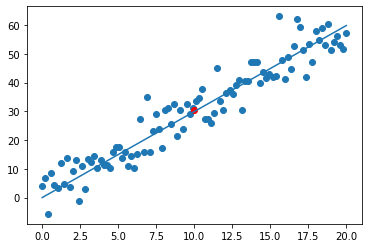

In [11]:
plt.scatter(x,y)
plt.plot(x,estimated_value)
input_x=10
output_x=results.x[0] + results.x[1]*input_x
plt.scatter(input_x,output_x,c='r', marker='o')

### Why the predicted value is the same as the OLS model? because the MLE model uses a gaussian prior that the estimated value is the mean of the samples, which is just what OLS assumes.